# Import Libraries

In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier #bagging 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,auc

# Read the csv file and display it

In [13]:
dataset = pd.read_csv('Soil.csv')
dataset.head()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,Fertile
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,Fertile
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,Fertile
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile


# Describe the data

In [14]:
dataset.describe()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000
mean,8.286500,0.29030,0.195200,0.331400,172.760000,13.195500,214.110000,0.494800,4.525000,0.306600,3.149000,87.31500,5.67300,7.011000,4.123000,5.239200
std,0.527127,0.26529,0.170486,0.293942,60.291735,8.391076,86.966834,0.257413,1.833767,0.173498,1.797388,5.21897,3.43937,2.801222,3.926872,2.935344
min,6.520000,0.02000,0.010000,0.010000,75.000000,1.800000,70.000000,0.040000,1.000000,0.010000,0.200000,77.20000,1.10000,2.000000,0.000000,1.200000
25%,8.060000,0.13000,0.080000,0.130000,125.000000,7.725000,145.000000,0.317500,3.200000,0.180000,1.800000,83.65000,3.57500,5.300000,0.000000,3.175000
50%,8.330000,0.18000,0.140000,0.240000,162.000000,10.450000,187.000000,0.460000,4.150000,0.280000,3.100000,88.30000,4.85000,6.650000,3.540000,4.885000
75%,8.580000,0.34250,0.240000,0.410000,218.000000,18.500000,265.750000,0.625000,6.100000,0.402500,4.225000,90.52500,7.50000,9.000000,6.305000,6.962500
max,9.480000,1.58000,0.740000,1.270000,278.000000,35.600000,480.000000,1.300000,9.100000,0.730000,7.500000,96.20000,18.00000,13.800000,16.190000,16.270000


# Check the shape of data

In [ ]:
dataset.shape

(100, 17)

# Check nan values

In [ ]:
dataset.isnull().sum()

pH        0
EC        0
OC        0
OM        0
N         0
P         0
K         0
Zn        0
Fe        0
Cu        0
Mn        0
Sand      0
Silt      0
Clay      0
CaCO3     0
CEC       0
Output    0
dtype: int64

# Label Encoding

In [ ]:
dataset.head()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,0
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,0
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,0
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,1
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,1


# Define X and Y

In [15]:
x= dataset.iloc[:,:-1] 

y = dataset.iloc[:,-1]

# Test Train Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)


# Build the Models

# Decision Tree

In [22]:
cls = DecisionTreeClassifier() 
cls.fit(X_train,y_train) #training of classifier
y_pred = cls.predict(X_test) 


In [23]:
dt_acc=accuracy_score(y_test,y_pred)
dt_cls=classification_report(y_test, y_pred)

In [24]:
conf_matrix = confusion_matrix(y_pred,y_test)
print(conf_matrix)

[[8 3]
 [1 8]]


# Random Forest

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [26]:
rf_acc=accuracy_score(y_test,y_pred)
rf_cls=classification_report(y_test, y_pred)

# Support Vector Machine

In [27]:
svm = SVC(probability=True,kernel = 'rbf', random_state =3)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)



In [28]:
svm_acc=accuracy_score(y_test,y_pred)
svm_cls=classification_report(y_test, y_pred)

# Bagging

In [29]:
estimators = []
model1=  RandomForestClassifier()
estimators.append(('RandomForest', model1)) 
model2=  DecisionTreeClassifier()
estimators.append(('DecisionTree', model2)) 
model3 = SVC(probability=True)
estimators.append(('svm', model3))
ensemble = VotingClassifier(estimators,voting='soft') #bagging ensembLe 
eclf1 = ensemble.fit(X_train,y_train) 
y_pred=eclf1.predict(X_test)



In [30]:
ens_acc=accuracy_score(y_test,y_pred)
ens_cls=classification_report(y_test, y_pred)

# XGBoost

In [31]:
ab = XGBClassifier()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)


In [32]:
xg_acc=accuracy_score(y_test,y_pred)
xg_cls=classification_report(y_test, y_pred)

# Printing the Accuracy 

In [33]:
print("Accuracy for Decision Tree: ",dt_acc)
print("\n\n")

print("Accuracy for Random Forest: ",rf_acc)
print("\n\n")

print("Accuracy for SVM: ",svm_acc)
print("\n\n")

print("Accuracy for Bagging Method: ",ens_acc)
print("\n\n")

print("Accuracy for XGboost: ",xg_acc)

Accuracy for Decision Tree:  0.8



Accuracy for Random Forest:  0.9



Accuracy for SVM:  0.95



Accuracy for Bagging Method:  0.9



Accuracy for XGboost:  0.85


# Print classification report

In [34]:
print("Classification Report for Decision Tree: \n",dt_cls)
print("\n\n")

print("Classification Report for Random Forest: \n",rf_cls)
print("\n\n")

print("Classification Report for SVM:\n ",svm_cls)
print("\n\n")

print("Classification Report for Bagging Method: \n",ens_cls)
print("\n\n")

print("Classification Report for Xgboost: ",xg_cls)

Classification Report for Decision Tree: 
               precision    recall  f1-score   support

     Fertile       0.73      0.89      0.80         9
 Non Fertile       0.89      0.73      0.80        11

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20




Classification Report for Random Forest: 
               precision    recall  f1-score   support

     Fertile       0.89      0.89      0.89         9
 Non Fertile       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20




Classification Report for SVM:
                precision    recall  f1-score   support

     Fertile       0.90      1.00      0.95         9
 Non Fertile       1.00      0.91      0.95        11

    accuracy                           0.95        20
   

# Saving the accuracy in dataframe

In [35]:
x=['Decision Tree','Random Forest','SVM','Bagging','Xgboost']
yacc=[dt_acc,rf_acc,svm_acc,ens_acc,xg_acc]


In [36]:
data = {'Algorithms':x,
        'Accuracy':yacc,
        }

In [37]:
df_acc=pd.DataFrame(data)
df_acc.head(5)

,Algorithms,Accuracy
0,Decision Tree,0.80
1,Random Forest,0.90
2,SVM,0.95
3,Bagging,0.90
4,Xgboost,0.85


In [38]:
df_acc.to_csv('Accuracy.csv',index=False)

# Comparison of Accuracy for each model using bar graph

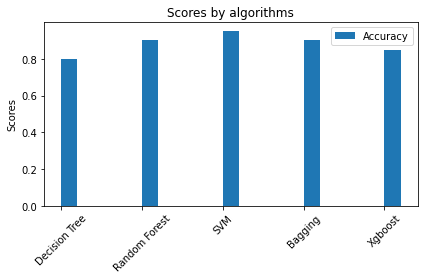

In [39]:
labels = df_acc['Algorithms']
acc = df_acc['Accuracy']


x = np.arange(len(labels))  # the label locations
w = 0.6
dimw = w / 3
fig, ax = plt.subplots()
rects1 = ax.bar(x+1*dimw, acc, dimw, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by algorithms')
ax.set_xticks(x + dimw / 2)
ax.set_xticklabels(labels,rotation = 45)
ax.legend()

fig.tight_layout()

plt.show()

# Prediction

In [40]:
pH=input('Enter PH:')
EC=input('Enter EC:')
OC=input('Enter OC:')
OM=input('Enter OM:')
N=input('Enter N:')
P=input('Enter P:')
K=input('Enter k:')
Zn=input('Enter Zn:')
Fe=input('Enter Fe:')
Cu=input('Enter Cu:')
Mn=input('Enter Mn:')
Sand=input('Enter Sand:')
Silt=input('Enter Silt:')
Clay=input('Enter Clay:')
CaCO3=input('Enter CaCo3:')
CEC=input('Enter CEC:')
Output=ensemble.predict([[float(pH),
                   float(EC),
                   float(OC),
                   float(OM),
                   float(N),
                   float(P),
                   float(K),
                   float(Zn),
                   float(Fe),
                   float(Cu),
                   float(Mn),
                   float(Sand),
                   float(Silt),
                   float(Clay),
                   float(CaCO3),
                   float(CEC),]])
print(Output)
print('Fertility Production:',Output)

Enter PH:6
Enter EC:44
Enter OC:56
Enter OM:55
Enter N:53
Enter P:33
Enter k:44
Enter Zn:33
Enter Fe:33
Enter Cu:33
Enter Mn:33
Enter Sand:33
Enter Silt:33
Enter Clay:33
Enter CaCo3:33
Enter CEC:33
['Fertile']
Fertility Production: ['Fertile']
